In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

**A)** _Realice graficas de cada espectro en terminos de intensidad
como función de pixeles(aqui puede ser útil trazar una línea de perfil)_

In [2]:
def load_data(dataset: str):
    
    data = pd.read_csv(dataset)
    x = data['Distance_(inches)']
    y = data['Gray_Value']
    
    return x,y 

In [3]:
def get_peaks(x: np.ndarray,
              y: np.ndarray, 
              prominence: float,
              distance: int):
    
    """
        Obtiene los picos
    """
    
    indx = find_peaks(y,
                      distance = distance,
                      prominence = prominence)
    
    xpeaks = np.array(x[indx[0]]).reshape(-1, 1)
    ypeaks = np.array(y[indx[0]]).reshape(-1, 1)
    # retorna los insumos para la regresión lineal 
    return xpeaks, ypeaks 

In [4]:
x, y = load_data(dataset = 'he1.csv')

#valores de calibración
calibracion = np.array([543.5, 632.8]).reshape(-1, 1)

# prominencia
valor_max = np.max(y)
peaksx, peaksy = get_peaks(x = x, 
                           y = y, 
                           prominence = valor_max/2, 
                           distance = 10)

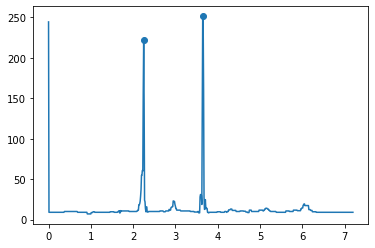

In [5]:
plt.plot(x, y)
plt.scatter(peaksx, peaksy)

Ahora hacemos el modelo de regresión lineal, lo que obtendremos de acá es un modelo que nos predice la longitud de onda en función de la posición dada.

In [6]:
model = LinearRegression()
model.fit(peaksx, calibracion)

LinearRegression()

In [7]:
print("pendiente: ",  model.coef_)
print("intercepto: ", model.intercept_)

pendiente:  [[63.97627218]]
intercepto:  [399.55338759]


# **B)** _Predecimos longitudes de onda_.

#### *Para el hidrógeno primero:*

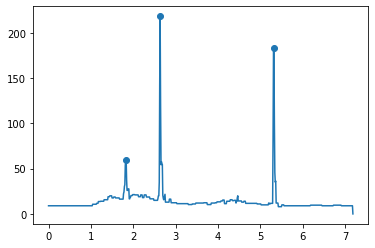

In [8]:
xh, yh = load_data(dataset = 'H_niveles.csv')
media = np.mean(yh)

xh_peaks, yh_peaks = get_peaks(x = xh, y = yh,
                               prominence = media, 
                               distance = 10)
plt.plot(xh, yh)
plt.scatter(xh_peaks, yh_peaks)

In [9]:
print("Las longitudes de onda en nanometros son: ")
model.predict(xh_peaks)

Las longitudes de onda en nanometros son: 


array([[516.84300667],
       [568.15773482],
       [739.42733356]])

### *Ahora para para el helio:*

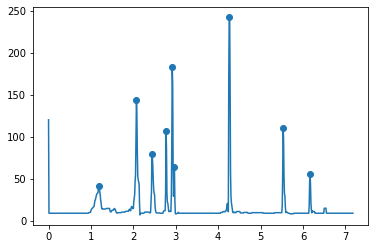

In [10]:
xhe, yhe = load_data(dataset = 'He_niveles.csv')
media = np.mean(yhe)

xhe_peaks, yhe_peaks = get_peaks(x = xhe, y = yhe,
                                 prominence = media, 
                                 distance = 5)
plt.plot(xhe, yhe)
plt.scatter(xhe_peaks, yhe_peaks)

In [11]:
print("Las longitudes de onda en nanometros son: ")
model.predict(xhe_peaks)

Las longitudes de onda en nanometros son: 


array([[475.52521081],
       [532.17108172],
       [555.49555103],
       [576.82076184],
       [586.15106138],
       [589.48294563],
       [672.11917712],
       [753.4221431 ],
       [794.07394597]])

### *Para para el hg:*

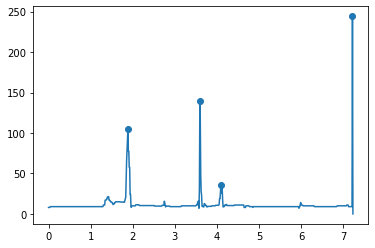

In [12]:
xhg, yhg = load_data(dataset = 'Hg_niveles.csv')
media = np.mean(yhg)

xhg_peaks, yhg_peaks = get_peaks(x = xhg, y = yhg,
                                 prominence = media, 
                                 distance = 5)
plt.plot(xhg, yhg)
plt.scatter(xhg_peaks, yhg_peaks)

In [13]:
print("Las longitudes de onda en nanometros son: ")
model.predict(xhg_peaks)

Las longitudes de onda en nanometros son: 


array([[520.17553069],
       [629.46811574],
       [661.45625184],
       [861.38210241]])

### *Para para el Kr:*

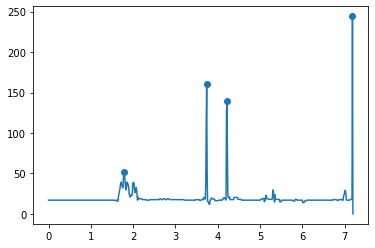

In [14]:
xkr, ykr = load_data(dataset = 'kr_niveles.csv')
media = np.mean(ykr)

xkr_peaks, ykr_peaks = get_peaks(x = xkr, y = ykr,
                                 prominence = media, 
                                 distance = 5)
plt.plot(xkr, ykr)
plt.scatter(xkr_peaks, ykr_peaks)

In [15]:
print("Las longitudes de onda en nanometros son: ")
model.predict(xkr_peaks)

Las longitudes de onda en nanometros son: 


array([[513.51112241],
       [638.79777552],
       [669.45328586],
       [859.3828439 ]])

### *Para para el Ar:*

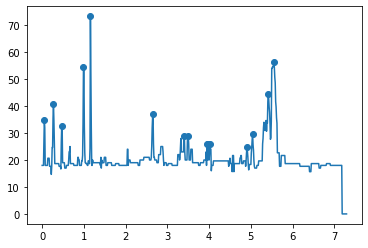

In [16]:
xar, yar = load_data(dataset = 'ar_niveles.csv')
media = np.mean(yar)
std = np.sqrt(np.var(yar))

xar_peaks, yar_peaks = get_peaks(x = xar, y = yar,
                                 prominence = media-2*std, 
                                 distance = 3)
plt.plot(xar, yar)
plt.scatter(xar_peaks, yar_peaks)

In [17]:
print("Las longitudes de onda en nanometros son: ")
model.predict(xar_peaks)

Las longitudes de onda en nanometros son: 


array([[402.88527185],
       [416.88008139],
       [429.54226518],
       [462.86302702],
       [473.5259523 ],
       [569.49036057],
       [616.80593195],
       [622.80370747],
       [652.12659206],
       [654.12585057],
       [656.79110207],
       [713.43697298],
       [722.10063976],
       [746.09174183],
       [754.75476885]])

### C) Usando el espectro para el Hidrógeno determine la constante de Rydberg.


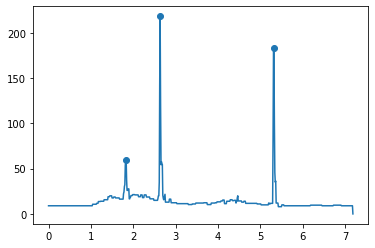

In [18]:
xh, yh = load_data(dataset = 'H_niveles.csv')
media = np.mean(yh)

xh_peaks, yh_peaks = get_peaks(x = xh, y = yh,
                               prominence = media, 
                               distance = 10)
plt.plot(xh, yh)
plt.scatter(xh_peaks, yh_peaks)

In [19]:
lambdas = model.predict(xh_peaks) * 1e-9 #lambda en metros
estado_base = np.ones((3, 1))*2
estado_exitacion = np.array([6, 5, 4]).reshape(-1, 1)

    
y = 1/lambdas
x = 1/(np.power(estado_base, 2)) - (1/(np.power(estado_exitacion, 2))) 

In [20]:
model = LinearRegression().fit(x, y)
print("pendiente (constante Rydberg): ",  model.coef_)

pendiente (constante Rydberg):  [[16940977.14779385]]
